In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.interpolate

In [261]:

df_data1=pd.read_table('crystal_data_4.txt',sep=" ",skiprows=4)
df_data2=pd.read_table('crystal_data_540.txt',sep=" ",skiprows=4)
df_data3=pd.read_table('crystal_data_5.txt',sep=" ",skiprows=4)
df_data4=pd.read_table('crystal_data_565.txt',sep=" ",skiprows=4)
df_data5=pd.read_table('crystal_data_570.txt',sep=" ",skiprows=4)
df_data6=pd.read_table('crystal_data_6.txt',sep=" ",skiprows=4)
#df_data7=pd.read_table('crystal_data_7.txt',sep=" ",skiprows=4)
#df_data8=pd.read_table('crystal_data_8.txt',sep=" ",skiprows=4)
#df_data9=pd.read_table('crystal_data_0.900000.txt',sep=" ",skiprows=4)
#df_data10=pd.read_table('crystal_data_1.000000.txt',sep=" ",skiprows=4)
df=[df_data1,df_data2,df_data3,df_data4,df_data5,df_data6]
df

/Users/samuelruhl/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  
/Users/samuelruhl/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/samuelruhl/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead.
  after removing the cwd from sys.path.
/Users/samuelruhl/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: read_table is deprecated, use read_csv instead.
  """
/Users/samuelruhl/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: read_table is deprecated, use read_csv instead.
  
/Users/samuelruhl/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:7: Futur

[        Generation         x         y     theta       psi       phi  \
 0                0  0.360673  0.947959  1.014260  2.028520  0.105526   
 1                0  0.898299  0.049355  0.182367  0.211051  1.495970   
 2                0  0.976854  0.669363  0.060815  0.364734  0.536609   
 3                0  0.381527  0.286174  0.981990  2.991950  1.129530   
 4                0  0.270486  0.091211  1.153810  0.121630  1.431210   
 5                0  0.902786  0.653227  0.175424  1.073220  0.561577   
 6                0  0.947961  0.243304  0.105522  1.963980  1.195870   
 7                0  0.655445  0.090413  0.558145  2.259070  1.432440   
 8                0  0.007968  0.618074  1.560010  2.307620  0.615971   
 9                0  0.829179  0.367684  0.289319  2.862420  1.003410   
 10               0  0.742793  0.178345  0.422988  0.350848  1.296380   
 11               0  0.831693  0.752201  0.285429  1.123150  0.408431   
 12               0  0.899036  0.128759  0.181226  

In [262]:
#split in Generations
runs=[]
for j,df_data in enumerate(df):
    count=0
    before=0
    generations=[]
    for i,gen in enumerate(df_data["Generation"]):
        if gen!=count:
            generations.append(df_data.iloc[before:i-1,:])
            before=i-1
            count+=1
    runs.append(generations)


In [264]:
#print(runs[0][10]['fitness'].idxmax())

In [265]:
#find fittest per Generation
lattice_sums=[]

fit_master=[]
for generations in runs:
    lattice_sum_fittest=[]
    fitest=[]
    best_sol_x=[]
    best_sol_y=[]
    for i,gen in enumerate(generations):
        #generations[i]['fitness']=generations[i]['fitness'].dropna()
        #for j,fit in enumerate(generations[i]['fitness']):
        #    generations[i]['fitness'][j] = float(fit)
        generations[i]['fitness'] = generations[i]['fitness'].astype(float)
        #print(generations[i].info() 
        fitest.append(generations[i]['fitness'].max())
        n=generations[i]['fitness'].idxmax()
        lattice_sum_fittest.append(generations[i]['lattice_sum'][n])
    lattice_sums.append(lattice_sum_fittest)
    fit_master.append(fitest)

/Users/samuelruhl/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


501


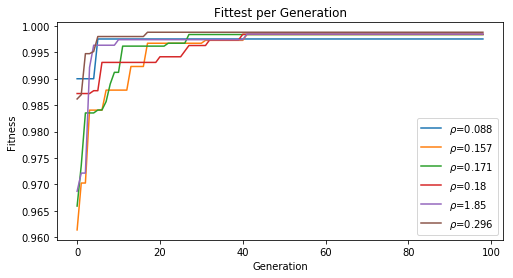

In [266]:
rho = [0.088,0.157,0.171,0.180,1.85,0.296]
plt.figure(figsize=(8,4))
for i,fitest in enumerate(fit_master):
    plt.plot(fit_master[i][1:100], label=r'$\rho$='+str(rho[i]))
#plt.yscale('log')
plt.ylabel('Fitness')
plt.xlabel('Generation')
plt.title('Fittest per Generation')
plt.legend()
plt.savefig('Fittest_crystal.png')

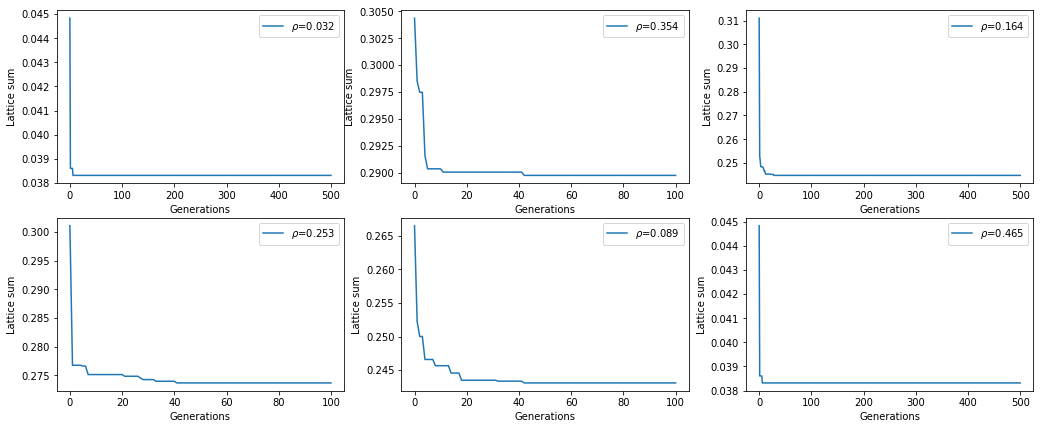

In [233]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(17.5, 7))
for i,lattice in enumerate(lattice_sums):
    rh = ((i+1)/10)**(3/2)
    axes[int(i%2),int(i%3)].set_ylabel('Lattice sum')
    axes[int(i%2),int(i%3)].set_xlabel('Generations')
    axes[int(i%2),int(i%3)].plot(lattice, label=r'$\rho$='+str(round(rh,3)))
    axes[int(i%2),int(i%3)].legend()
    
plt.savefig('lattice_sums.png')

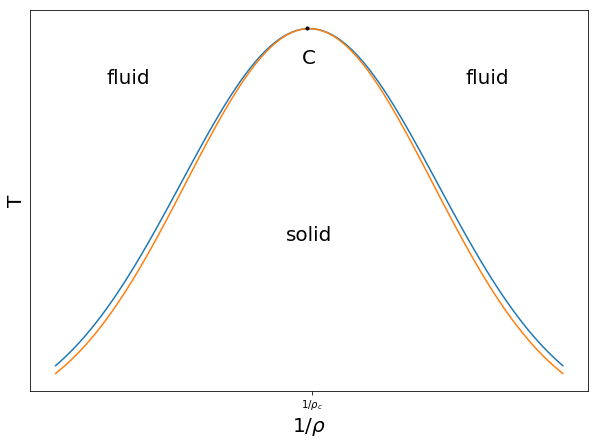

In [140]:
x=np.linspace(-1.4,1.4,100);
x1=np.linspace(-1.3,1.3,100)
y1=np.exp(-(x1**2/0.8))-0.36
y=np.exp(-(x**2))-0.36
fig=plt.figure(figsize=(10,7))
plt.plot(y)
plt.plot(y1,label='fluid phase')
plt.ylabel('T',fontsize=20)
plt.xlabel(r'$1/\rho$',fontsize=20)
plt.title('')
plt.xticks([50],[r'$1/\rho_c$'])
plt.yticks([],[])
plt.text(10,0.5,'fluid',fontsize=20)
plt.text(80,0.5,'fluid',fontsize=20)
plt.text(45,0.1,'solid',fontsize=20)
plt.text(48,0.55,'C',fontsize=20)
plt.plot(49,np.exp(-(0.665**2)),'.',c='black')
plt.savefig('Trho.png')

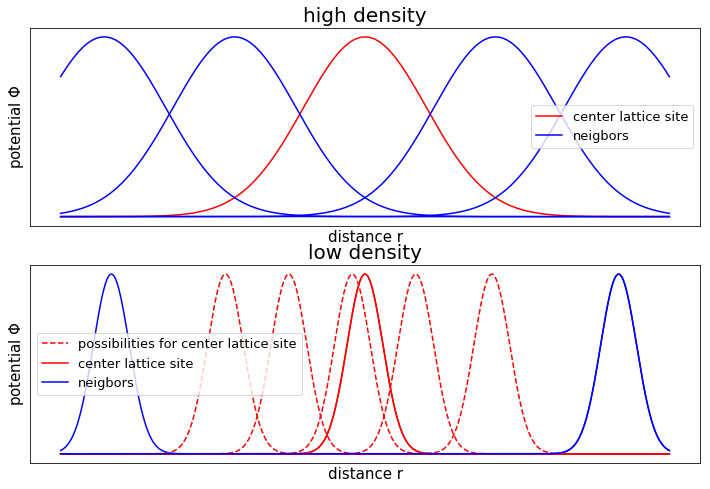

In [12]:

#-----subplot1---------
x=np.linspace(-12,12,10000)
y=np.exp(-(x**2))
y1=np.exp(-((x-10)**2))
y2=np.exp(-((x+10)**2))
y3=np.exp(-((x-2)**2))
y4=np.exp(-((x+3)**2))
y5=np.exp(-((x-5)**2))
y6=np.exp(-((x+5.5)**2))
y7=np.exp(-((x+0.5)**2))
fig=plt.figure(figsize=(12,8))
plt.subplot(2,1,2)
plt.plot(y,c='r')
plt.plot(y1,c='b')
plt.plot(y2,c='b')
plt.plot(y3,c='r',linestyle="--",label='possibilities for center lattice site')
plt.plot(y4,c='r',linestyle="--")
plt.plot(y5,c='r',linestyle="--")
plt.plot(y6,c='r',linestyle="--")
plt.plot(y7,c='r',linestyle="--")
plt.xticks([],[])
plt.yticks([],[])
plt.ylabel(r'potential $\Phi$',fontsize=15)
plt.xlabel(r'distance r',fontsize=15)
plt.plot(y,c='r',label='center lattice site')
plt.plot(y1,c='b',label='neigbors')
plt.title("low density",fontsize=20)
plt.legend(fontsize=13)
#-----subplot2---------
x=np.linspace(-3.5,3.5,10000)
plt.subplot(2,1,1)
y=np.exp(-(x**2))
y1=np.exp(-((x-1.5)**2))
y2=np.exp(-((x+1.5)**2))
y3=np.exp(-((x-3)**2))
y4=np.exp(-((x+3)**2))
plt.plot(y,c='r',label='center lattice site')
plt.plot(y1,c='b',label='neigbors')
plt.plot(y2,c='b')
plt.plot(y3,c='b')
plt.plot(y4,c='b')
plt.title("high density",fontsize=20)
plt.xticks([],[])
plt.yticks([],[])
plt.ylabel(r'potential $\Phi$',fontsize=15)
plt.xlabel(r'distance r',fontsize=15)
plt.legend(fontsize=13)
plt.savefig('potential.png')